# ¿Qué vende un coche?<a name="id0"></a>

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# Contentido <a id='back'></a>

* [Introducción](#intr)
* [Iniciación](#inic)
* [Tratar los valores ausentes](#trat)
* [Corregir los tipos de datos](#corr)
* [Enriquecer datos](#enri)
* [Comprobar datos limpios](#comp)
* [Estudiar parámetros principales](#estu)
    * [Estudiar y tratar valores atípicos](#estu2)
    * [Estudiar parámetros principales sin valores atípicos](#estu3)
* [Periodo de colocación de los anuncios](#peri)
* [Precio promedio por cada tipo de vehículo](#prec)
* [Factores de precio](#fact)
* [Conclusión general](#end)

## Introducción<a id='intr'></a>
Vamos a realizar el análisis de registros de anuncios de vehículos y determinaremos qué factores influyen en el precio de un vehículo.

### Objetivos
-  Realizar un análisis exploratorio de los datos recopilados del 2018 y 2019.
-  Indicar el tiempo de vida típica de los anuncios.
-  Determinar factores que influyan en el precio del vehículo.


## Inicialización<a id='inic'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos

In [2]:
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`- precio de venta del vehículo
- `model_year`- año del vehículo
- `model` - modelo del vehículo
- `condition`- estado del vehículo: nuevo, como nuevo, excelente, etc
- `cylinders`- cilindraje del vehiculo
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`- transmisión manual, automática, otro.
- `type` - tipo SUV, sedán, pickup, otro.
- `paint_color`- color del vehículo
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
# Estadísticas descriptivas por columnas
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
data[['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'date_posted']].describe()

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [7]:
# valores ausentes por columna
columns_nan = data.isna().sum()[data.isna().sum() > 0]
columns_nan

model_year      3619
cylinders       5260
odometer        7892
paint_color     9267
is_4wd         25953
dtype: int64

In [8]:
data.is_4wd.value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [9]:
data.duplicated().sum()

0

### Conclusiones y siguientes pasos

-  El data set contiene 51.525 registros. 
-  Observamos columnas con datos ausentes, y tipos de datos no apropiados.
-  Los datos ausentes están en las columnas: model_year, cylinders, odometer, paint_color, is_4wd.
-  La columna is_4wd tiene la mitad de valores NaN, al ser una columna que contendra 1 para indicar Verdadero y 0 para indicar Falso, podemos indicar que el NaN simboliza los 0 porlo que se realizará el cambio correspondiente.
-  Existen tipos de datos inapropiados en varias columnas. Se deberá realizar el cambio correspondiente así:
   - a int las columnas model_year, cylinders, odometer, 
   - a bool la columna is_4wd, y 
   - a datetime a la columna date_posted.
- En la columna precio notamos que el valor mínimo es 1, por lo que podrían ser valores erroneos, revisaremos más adelante.
- No se encontraron registros duplicados.

[Volver a Contenidos](#back)

## Tratar los valores ausentes<a id='trat'></a>

In [10]:
# Valores ausentes

print('Total NaN:')
print((columns_nan / len(data)).map("{:.2%}".format) )


Total NaN:
model_year      7.02%
cylinders      10.21%
odometer       15.32%
paint_color    17.99%
is_4wd         50.37%
dtype: object


Teniendo en mente los porcentajes de NaN por columna, continuaremos con el tratamiento de estos valores ausentes por cada columna.

### Columna model_year

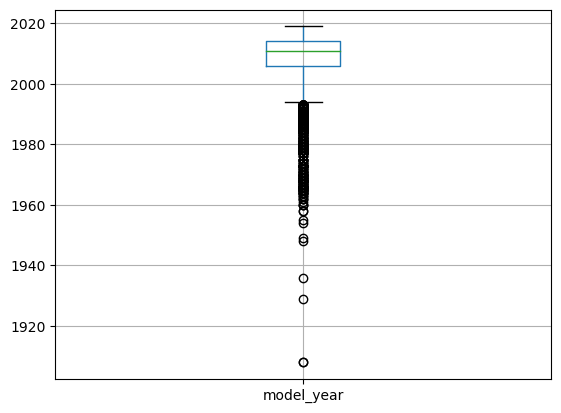

In [11]:
# distribución de datos 
data.boxplot('model_year')
plt.show()

Ahora que tenemos idea de como están distribuidos los datos, realizaremos el imputamiento usando medianas condicionadas por el modelo del vehículo. Antes revisemos como quedaría el imputamiento

In [12]:
# Revisión preliminar antes del imputamiento

index_nan = data[data.model_year.isna()].index

print('Revisión preliminar')

print()
print('model_year original')
print(data['model_year'].head())

print()
print('así sería el imputamiento')
print(data.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median())).head())

print()
print('Medianas de model_year que se imputarán')
print(data.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))[index_nan]
      .value_counts().sort_values(ascending=False))


Revisión preliminar

model_year original
0    2011.0
1       NaN
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64

así sería el imputamiento
0    2011.0
1    2011.0
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64

Medianas de model_year que se imputarán
2011.0    642
2008.0    538
2012.0    514
2010.0    477
2013.0    445
2009.0    347
2007.0    211
2014.0     92
2015.0     80
2005.0     46
2004.0     40
2016.0     39
2000.0     35
2018.0     29
2006.0     25
2010.5     23
2017.0     18
2006.5     18
Name: model_year, dtype: int64


In [13]:
# Relleno a valores NaN
data['model_year'] = data.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median())).round()

Ok, hemos realizado el imputamiento, ahora comprobemos valores asignados

In [14]:
# Comprobar valores asignados
data['model_year'][index_nan].value_counts(dropna=False).sort_values(ascending=False)

2011.0    642
2008.0    538
2012.0    514
2010.0    500
2013.0    445
2009.0    347
2007.0    211
2014.0     92
2015.0     80
2005.0     46
2006.0     43
2004.0     40
2016.0     39
2000.0     35
2018.0     29
2017.0     18
Name: model_year, dtype: int64

De acuerdo al diagrama de caja y bigotes de `model_year` nos muestra la existencia de valores atípicos. Por lo que se elige la mediana para realizar el imputamiento. Para no trastocar la distribución de valores en model_year se calcula una mediana condicionada al modelo del vehículo (columna model).


* Se realiza el imputamiento al 7% de valores (3619 NaN) fueron cambiados por 16 años diferentes, de los cuales:
    * 642 NaN con 2011
    * 538 NaN con 2008
    * 514 NaN con 2012, 
    * 500 NaN con 2010, etc.


### Columna cylinders

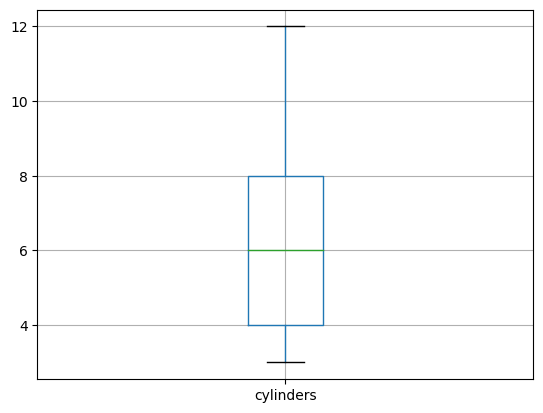

In [15]:
# distribución de datos 
data.boxplot(column='cylinders')
plt.show()

Ahora que tenemos idea de como están distribuidos los datos, realizaremos el imputamiento usando medianas condicionadas por el modelo del vehículo. Antes revisemos como quedaría el imputamiento

In [16]:
# Revisión preliminar antes del imputamiento

#guarda indices NaN
index_nan2 = data[data.cylinders.isna()].index

print('Revisión preliminar')

print()
print('cylinders original')
print(data['cylinders'].head(10))

print()
print('así sería el imputamiento')
print(data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median())).head(10))

print()
print('Medianas de cylinders que se imputarán')
print(data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))[index_nan2]
      .value_counts().sort_values(ascending=False))


Revisión preliminar

cylinders original
0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
5    6.0
6    4.0
7    6.0
8    4.0
9    NaN
Name: cylinders, dtype: float64

así sería el imputamiento
0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
5    6.0
6    4.0
7    6.0
8    4.0
9    6.0
Name: cylinders, dtype: float64

Medianas de cylinders que se imputarán
8.0    1868
6.0    1735
4.0    1635
5.0      22
Name: cylinders, dtype: int64


In [17]:
# Relleno a valores NaN
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median())).round()

Ok, hemos realizado el imputamiento, ahora comprobemos valores asignados

In [18]:
# Comprobar valores asignados
data['cylinders'][index_nan2].value_counts().sort_values(ascending=False)

8.0    1868
6.0    1735
4.0    1635
5.0      22
Name: cylinders, dtype: int64

-  El 10% de valores de la columna cylinders correspondiente a los valores ausentes, fueron reemplazados por 4 diferentes mediana de los cilindrajes condicionados al modelo de vehículo. 
    * 1868 NaN fueron sustituidos por cilindraje 8
    * 1735 NaN fueron sustituidos por cilindraje 6
    * 1635 NaN fueron sustituidos por cilindraje 4
    *   22 NaN fueron sustituidos por cilindraje 5


### Columna odometer

In [19]:
data.query('odometer.isna()').tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


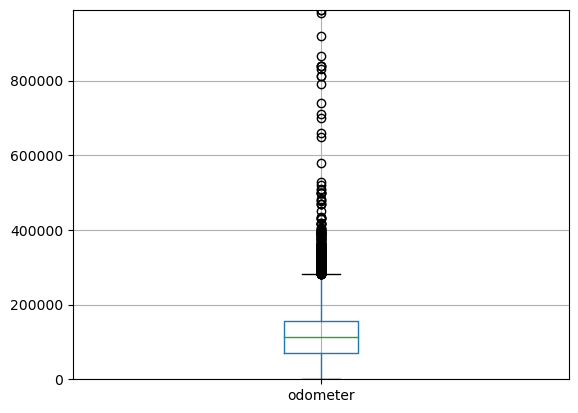

In [20]:
# distribución de datos 
data.boxplot('odometer')
plt.ylim(0,990000)
plt.show()

Ahora que tenemos idea de como están distribuidos los datos, realizaremos el imputamiento usando medianas condicionadas por la condición del vehículo. Antes revisemos como quedaría el imputamiento

In [21]:
# Revisión preliminar antes del imputamiento

#guarda indices NaN
index_nan3 = data[data.odometer.isna()].index

print('Revisión preliminar')

print()
print('odometer original')
print(data['odometer'].head())

print()
print('así sería el imputamiento')
print(data.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median())).round().head())

print()
print('Medianas de cylinders que se imputarán')
print(data.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median())).round()[index_nan3]
      .value_counts().sort_values(ascending=False))


Revisión preliminar

odometer original
0    145000.0
1     88705.0
2    110000.0
3         NaN
4     80903.0
Name: odometer, dtype: float64

así sería el imputamiento
0    145000.0
1     88705.0
2    110000.0
3    181613.0
4     80903.0
Name: odometer, dtype: float64

Medianas de cylinders que se imputarán
104230.0    3800
129000.0    3092
72982.0      728
181613.0     237
8002.0        18
142674.0      17
Name: odometer, dtype: int64


In [22]:
# Relleno a valores NaN
data['odometer'] = data.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median())).round()

Ok, hemos realizado el imputamiento, ahora comprobemos valores asignados

In [23]:
data['odometer'][index_nan3].value_counts()

104230.0    3800
129000.0    3092
72982.0      728
181613.0     237
8002.0        18
142674.0      17
Name: odometer, dtype: int64

El 15% de valores de la columna odometer correspondiente a los valores ausentes, fueron reemplazados por 6 medianas de odometer (millaje) condicionadas por la condición del vehículo.
   * 3800 NaN se sustituyeron por 104230 (millaje)
   * 3092 NaN se sustituyeron por 129000 (millaje)
   * 728 NaN se sustituyeron por 72982 (millaje), etc.

### Columna paint_color

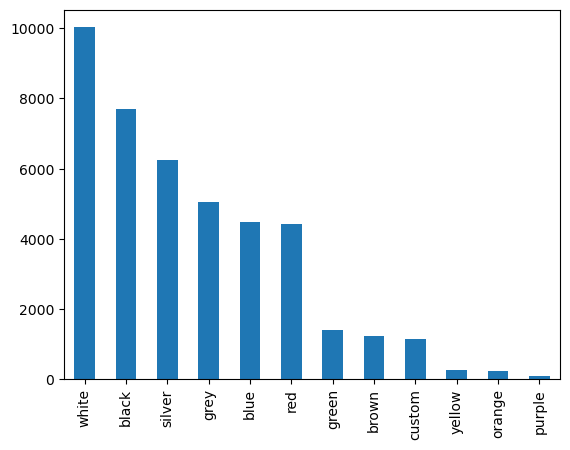

In [24]:
data.paint_color.value_counts().plot(kind='bar')
plt.show()

In [25]:
data['paint_color']

0          NaN
1        white
2          red
3          NaN
4        black
         ...  
51520    black
51521    white
51522     blue
51523    black
51524      NaN
Name: paint_color, Length: 51525, dtype: object

Ahora que tenemos idea de como están distribuidos los datos y debido a que es difícil determinar el color de un auto a partir de otras columnas o de acuerdo al valor más usual (calculando una moda), vamos ha asignar a los NaN la palabra 'undefined'.

In [26]:
# Guardamos los indices de NaN para comprobar después

index_nan4 = data[data.paint_color.isna()].index
data['paint_color'][index_nan4].head()

0     NaN
3     NaN
8     NaN
12    NaN
21    NaN
Name: paint_color, dtype: object

In [27]:
# Relleno a valores NaN

data['paint_color'] = data['paint_color'].fillna('undefined')

In [28]:
# Comprobamos que se realizó el imputamiento

data['paint_color'][index_nan4].head()

0     undefined
3     undefined
8     undefined
12    undefined
21    undefined
Name: paint_color, dtype: object

In [29]:
data['paint_color'].value_counts(normalize=True)

white        0.194643
undefined    0.179854
black        0.149287
silver       0.121184
grey         0.097758
blue         0.086851
red          0.085803
green        0.027094
brown        0.023736
custom       0.022377
yellow       0.004949
orange       0.004483
purple       0.001980
Name: paint_color, dtype: float64

A los vehículos que no tenían asignado un color, se le asignó la palabra 'undefined'; esto ocurrió en el 18% en los datos  de la columna paint_color.

### Columna is_4wd

In [30]:
data.is_4wd.value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [31]:
# Relleno a valores NaN
data.is_4wd.fillna(0, inplace=True)

In [32]:
data.is_4wd.value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

La 50% de los datos de la columna is_4wd es NaN y el otro es 1, siendo esta una columna con valores booleanos: true 1/false 0. Es así que podemos asumir que los NaN representan los valores 0 (false). Dicho esto, se realizó el imputamiento de los dichos datos con el valor de 0.

[Volver a Contenidos](#back)

## Corregir los tipos de datos<a id='corr'></a>

In [33]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data['is_4wd']      = data['is_4wd'].astype('bool')
data['model_year']  = data['model_year'].astype('int64')
data['cylinders']   = data['cylinders'].astype('int64')
data['odometer']    = data['odometer'].astype('int64')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


Se corrigieron los tipos de datos de las columnas date_posted, is_4wd, model_year, cylinders, y odometer.

[Volver a Contenidos](#back)

## Enriquecer datos<a id='enri'></a>

In [35]:
# Crea nuevas columnas día de la semana, mes y año en el que el anuncio se colocó
data['day_week'] = data['date_posted'].dt.weekday
data['month'] = data['date_posted'].dt.month
data['year'] = data['date_posted'].dt.year

In [36]:
# Crea columna de años del vehículo cuando el anuncio se colocó más 1
data['use_years'] = (data.year - data.model_year) + 1

In [37]:
# Agrega el millaje promedio del vehículo por año
data['miles_year'] = data['odometer'] / data['use_years']

In [38]:
#  Cambia el tipo de dato de la columna miles_year a entero
data['miles_year'] = data['miles_year'].astype('int64')

In [39]:
# Función para reemplazar la condición por valores categóricos
# nuevo = 5, como nuevo = 4, excelente = 3, bien = 2, bastante = 1, para rescate = 0
            
def replace_condition(value):      
    if value == 'new':
        return 5
    elif value == 'like new':
        return 4
    elif value == 'excellent':
        return 3
    elif value == 'good':
        return 2
    elif value == 'fair':
        return 1
    elif value == 'salvage':
        return 0

In [40]:
# Reemplazar aplicando la funcion replace_condition
data['condition'] = data['condition'].apply(replace_condition)

In [41]:
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [42]:
# Muestra las nuevas columnas en el dataset
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_week,month,year,use_years,miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,undefined,True,2018-06-23,19,5,6,2018,8,18125
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,undefined,False,2019-03-22,9,4,3,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967


Se calcularon y añadieron a la tabla varias columnas
   - day_week: Día de la semana en que el anuncio se colocó
   - month: Mes en que el anuncio se colocó
   - year: Año en el que el anuncio se colocó
   - use_years: Los años (edad) del vehículo cuando el anuncio se colocó
   - miles_year: La media de millaje del vehículo por año

En la columna condition, se reemplazaron los valores de cadena con una escala numérica:
   - nuevo = 5
   - como nuevo = 4
   - excelente = 3
   - bien = 2
   - bastante = 1
   - para rescate = 0


[Volver a Contenidos](#back)

## Comprobar datos limpios<a id='comp'></a>

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_week      51525 non-null  int64         
 14  month         51525 non-null  int64         
 15  year          51525 non-null  int64 

In [44]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_week,month,year,use_years,miles_year
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,6,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,17,10676
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,10,12800
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,6,23262
51524,6300,2014,nissan altima,2,4,gas,129000,automatic,sedan,undefined,False,2018-06-05,10,1,6,2018,5,25800


[Volver a Contenidos](#back)

## Estudiar parámetros principales<a id="estu"></a>

Revisaremos los parámetros:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

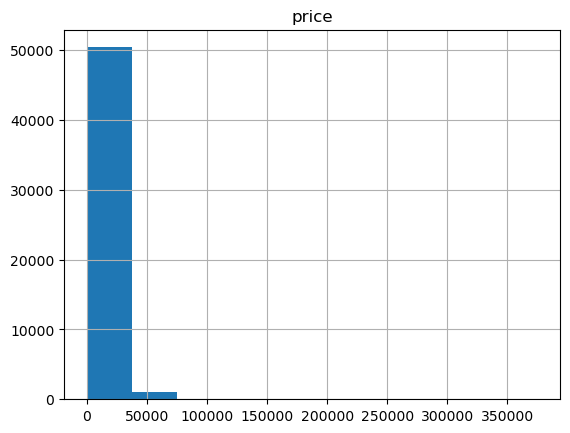

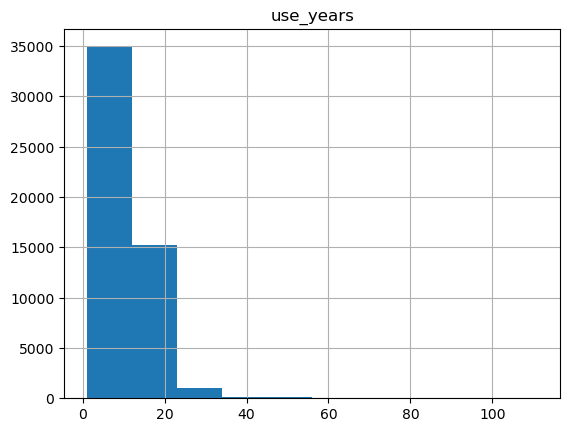

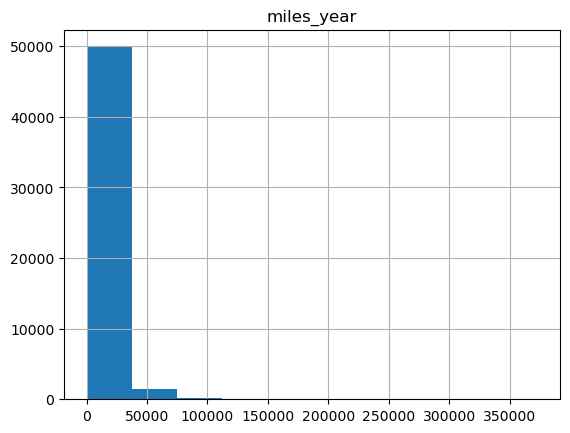

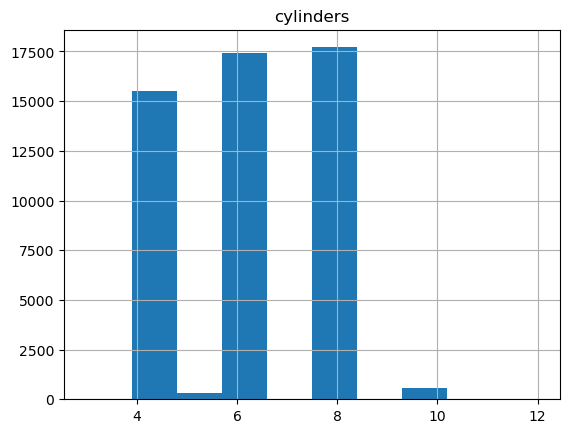

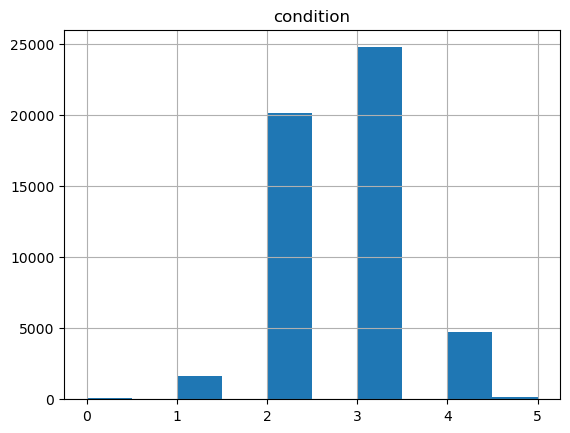

In [45]:
parameter = ['price', 'use_years', 'miles_year', 'cylinders', 'condition']
for i in parameter:
    data.hist(i)
    plt.show()

-  Hemos podido observar la distribución de los datos de cada columna. 

-  En la columnas: 'price', 'use_years', 'miles_year', se observan valores atípicos que afectan la forma y la legibilidad de los histogramas. Por lo contrario, en la columna 'cylinders' y 'condition' se observan los datos con una distribución normal.

-  A continuación vamos a buscar y tratar los valores atípicos.

[Volver a Contenidos](#back)

### Estudiar y tratar valores atípicos<a id='estu2'></a>

Revisaremos los valores atípicos de las siguientes columnas, para su posterior eliminación.

*  price
*  use_years
*  miles_year

In [46]:
# Definición de columnas a limpiar
columns_to_clean = ['price', 'use_years', 'miles_year']

In [47]:
# Función bounds para calcular los límites superior e inferior de una columna.

def bounds(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = (Q1 - 1.5 * IQR).astype('int')
    lim_max = (Q3 + 1.5 * IQR).astype('int')
    
    return [lim_min, lim_max]

    # Retornamos una lista con 2 valores [limite inferior, limite superior]

In [48]:
# Función outliers encuentra los índices de los datos atípicos

def outliers(df, col):
    min, max = bounds(df, col)
    return df[(df[col] <= min) | (df[col] >= max)].index


In [49]:
# Función clean_outliers para eliminar datos atípicos

def clean_outliers(df, col):
    indexes = outliers(df, col)
    df.drop(indexes, inplace=True)


In [50]:
# Función para visualizar las columnas con los outliers

def boxplot_outliers(df, col):
   
    df.boxplot(column=col)
    plt.hlines(y=[bounds(df, col)], xmin=0.9, xmax=1.1, color='red')
    plt.show()

Outliers: 3%


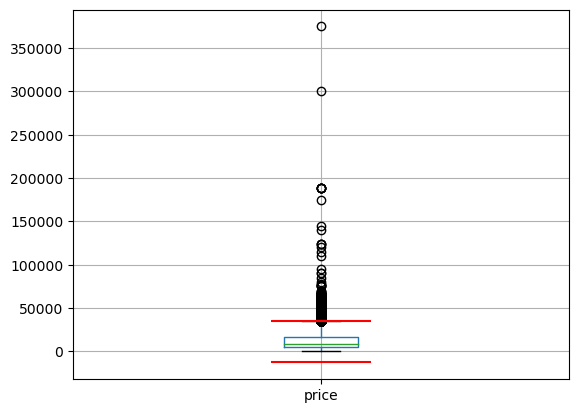

Outliers: 2%


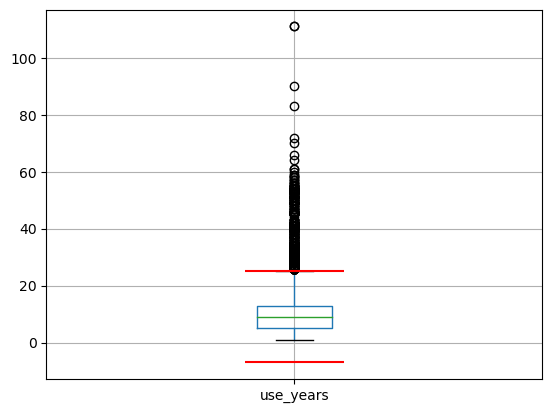

Outliers: 6%


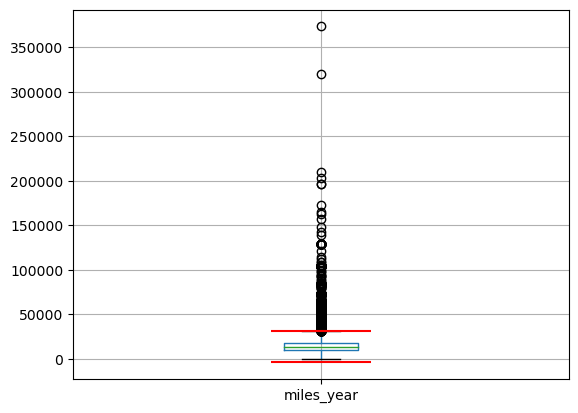

In [51]:
# Primero revisamos outliers por cada columna realizando diagramas de cajas y bigote

for column in columns_to_clean:
    print(f'Outliers: {len(outliers(data, column)) / len(data):.0%}')
    boxplot_outliers(data, column)


In [52]:
# Crea una nueva tabla 'data_clean' eliminando los outliers de data

data_clean = data.copy()
total_data = len(data)
aux = 0

while True:
    
    # Mostrar % outliers encontrados

    print('Outliers encontrados:')
    for column in columns_to_clean:
        print(f'  {column}: {(len(outliers(data_clean, column)) / total_data):.1%}')

        
    # Eliminamos outliers en las 4 columnas con la función clean_outliers

    for column in columns_to_clean:
        clean_outliers(data_clean, column)

        
    # Revisamos los registros eliminados porcentualmente

    total_data_clean = len(data_clean)
    total_deleted = total_data - total_data_clean
    percent = total_deleted / total_data

    # Sale del while cuando los datos de data_clean ya no se puedan limpiar más
    if total_data_clean == aux:
        break
    else:
        aux = total_data_clean

    print(f'{percent:.1%} registros eliminados\n')

Outliers encontrados:
  price: 3.2%
  use_years: 1.7%
  miles_year: 5.7%
10.1% registros eliminados

Outliers encontrados:
  price: 1.6%
  use_years: 0.8%
  miles_year: 1.2%
13.6% registros eliminados

Outliers encontrados:
  price: 0.4%
  use_years: 0.0%
  miles_year: 0.2%
14.2% registros eliminados

Outliers encontrados:
  price: 0.2%
  use_years: 0.0%
  miles_year: 0.0%
14.5% registros eliminados

Outliers encontrados:
  price: 0.0%
  use_years: 0.0%
  miles_year: 0.0%
14.6% registros eliminados

Outliers encontrados:
  price: 0.0%
  use_years: 0.0%
  miles_year: 0.0%
14.6% registros eliminados

Outliers encontrados:
  price: 0.0%
  use_years: 0.0%
  miles_year: 0.0%


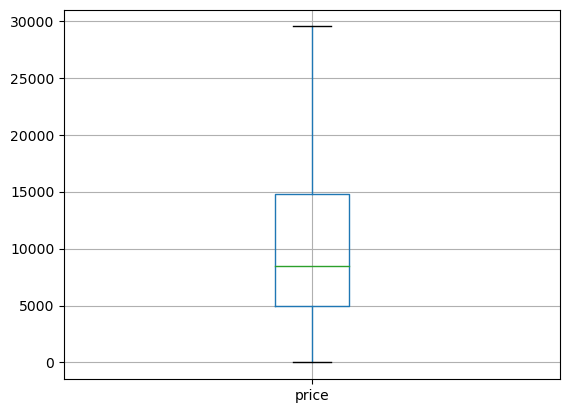

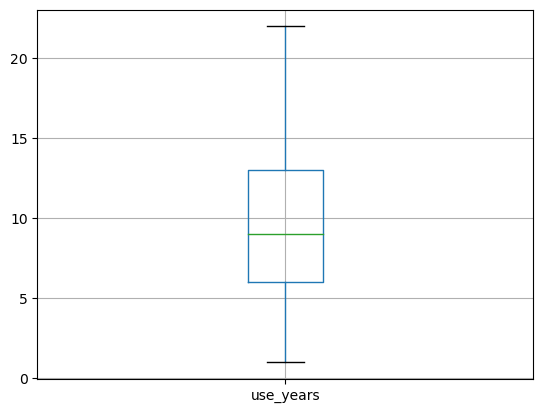

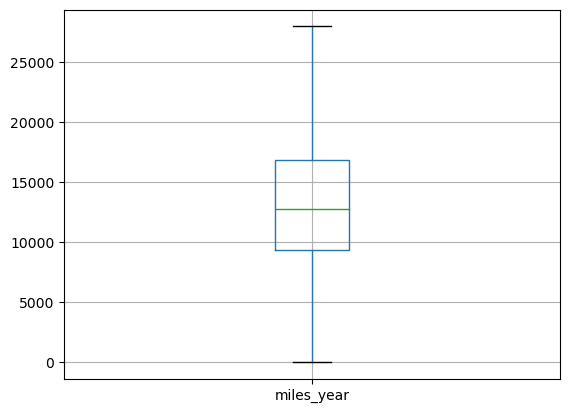

In [53]:
# Comprobamos que las columnas no tienen outliers

for x in columns_to_clean:
    data_clean.boxplot(x)
    plt.show()

In [54]:
len(data_clean)

43987

In [55]:
(len(data) - len(data_clean)) / len(data)

0.14629791363415817

Se realizan ciclos iterativos buscando y eliminando valores atípicos, por lo que se pudo observar el porcentaje de registros eliminados en cada iteración:

* Outliers encontrados primera vez:   price: 3.2%,  use_years: 1.7%,  miles_year: 5.7%
* Outliers encontrados segunda vez:   price: 1.6%, use_year: 0.8%, miles_year: 1.2%
* Outliers encontrados tercera vez:   price: 0.4%, miles_year: 0.2%
* Outliers encontrados cuarta vez:    price: 0.2%


Se eliminaron el 15% de registros siendo estos valores outliers en las columnas price, use_years, y miles_year.

[Volver a Contenidos](#back)

### Estudiar parámetros principales sin valores atípicos<a id='estu3'></a>

Original


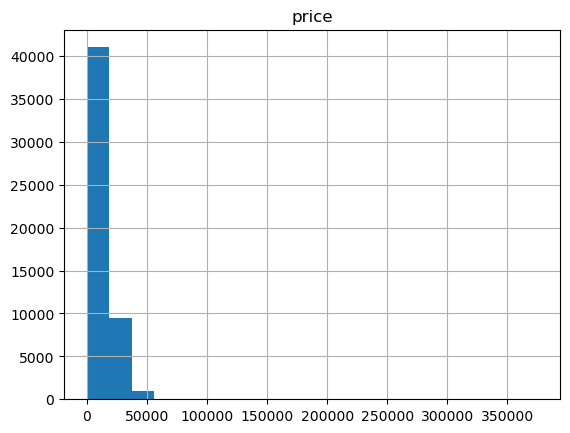

Sin valores atipicos


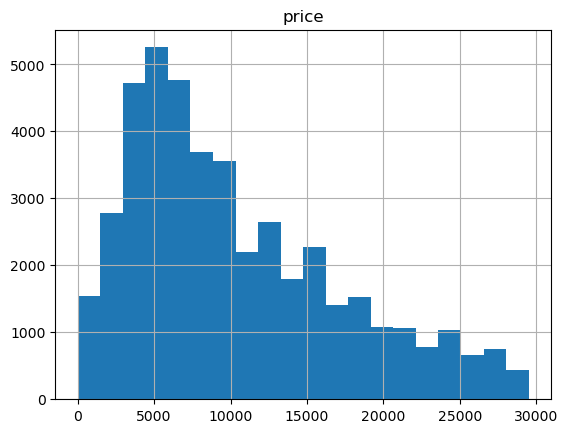

In [56]:
print('Original')
data.hist('price', bins=20)
plt.show()

print('Sin valores atipicos')
data_clean.hist('price', bins=20)

plt.show()

El histograma sin valores atípicos muestra con más claridad la distribución de los precios típicos.
Se observa que los precios más representativos están entre 4.000 a 7.000 usd.

Original


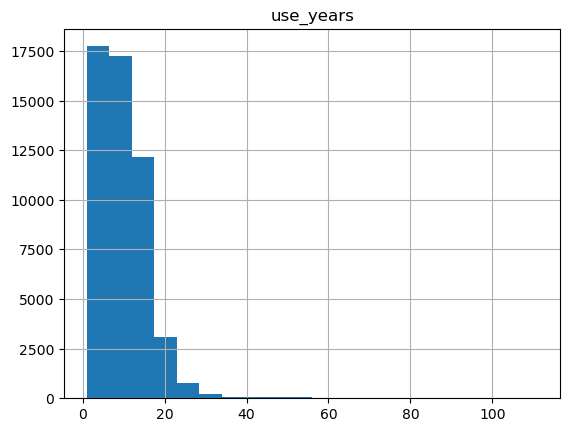

Sin valores atipicos


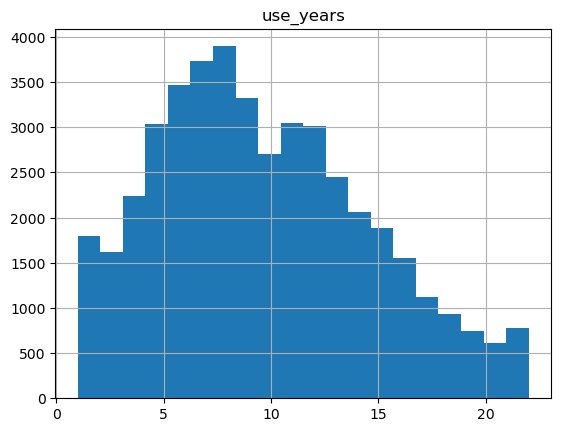

In [57]:
print('Original')
data.hist('use_years', bins=20)
plt.show()

print('Sin valores atipicos')
data_clean.hist('use_years', bins=20)
plt.show()

Como observamos en el histograma sin valores atípicos, aproximadamente entre 5 a 9 años es la edad de los carros publicados más frecuentemente.

Original


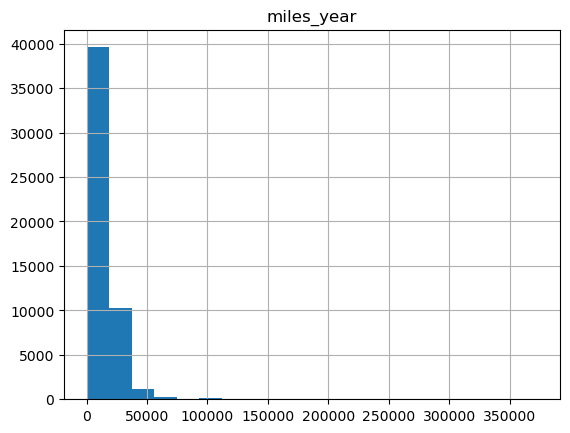

Sin valores atipicos


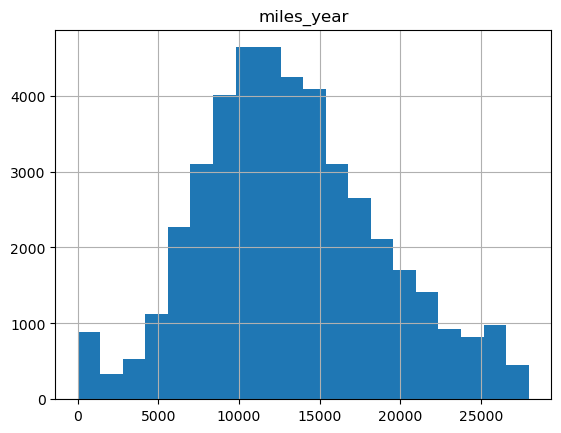

In [58]:
print('Original')
data.hist('miles_year', bins=20)
plt.show()

print('Sin valores atipicos')
data_clean.hist('miles_year', bins=20)
plt.show()

El histograma sin valores atípicos, nos indica que el millaje promedio anual de los vehículos más publicados está entre 8.000 a 15.000.

[Volver a Contenidos](#back)

## Periodo de colocación de los anuncios<a id='peri'></a>


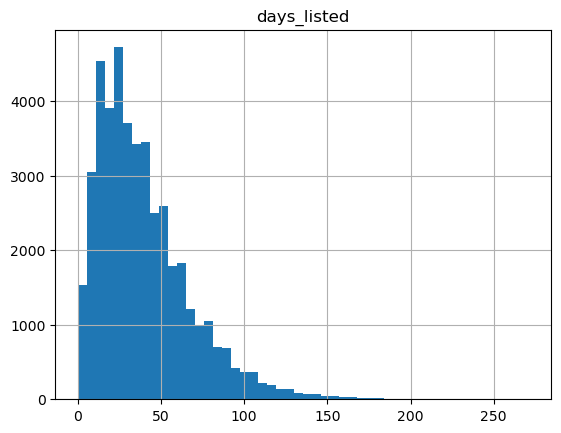

In [59]:
data_clean.hist('days_listed', bins=50)
plt.show()

In [60]:
# Media, mediana y moda de days_listed (excluyendo datos atipicos)

li, ls = bounds(data_clean, 'days_listed') #limites
range_good = '0 < days_listed < @ls' 

print('Periodo válido de publicaciones: 0 a', ls)
print('Media',     (data_clean.query(range_good)['days_listed'].mean().astype('int')))
print('Mediana',   (data_clean.query(range_good)['days_listed'].median().astype('int')))
print('Moda',       data_clean.query(range_good)['days_listed'].mode().values)


Periodo válido de publicaciones: 0 a 104
Media 36
Mediana 32
Moda [18]


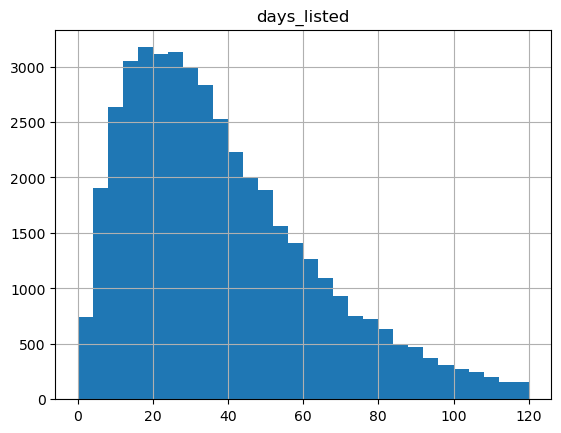

In [61]:
data_clean.hist('days_listed', bins=30, range=(0, 120))
plt.show()

La vida útil típica de un anuncio es de 18 días, y el periodo de colocación habitual es de 15 a 35 días. Si un anuncio se elimina en menos de 5 días, esto es anormalmente rápido. Si un anuncio ha estado publicado durante más de 100 dias, es anormalmente largo.

[Volver a Contenidos](#back)

## Precio promedio por cada tipo de vehículo<a id='prec'></a>

In [62]:
# Tabla dinámica con el número de anuncios y el precio promedio para cada tipo de vehículo

type_price = data_clean.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
type_price.columns = ['total', 'price']
type_price.price = type_price.price.astype('int')

#type_price.reset_index(inplace=True)
type_price.sort_values(by='total', ascending=False, inplace=True)
type_price.head(13)

,total,price
type,,
sedan,11183,6697
SUV,11021,9751
truck,9738,13744
pickup,5502,13486
coupe,1854,12895
wagon,1456,8687
mini-van,1062,7537
hatchback,955,6593
van,521,7726


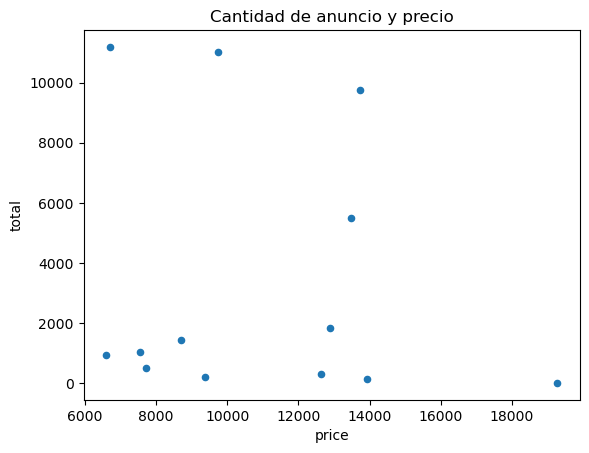

In [63]:
type_price.plot(x='price', y='total', kind='scatter', title='Cantidad de anuncio y precio')
plt.show()

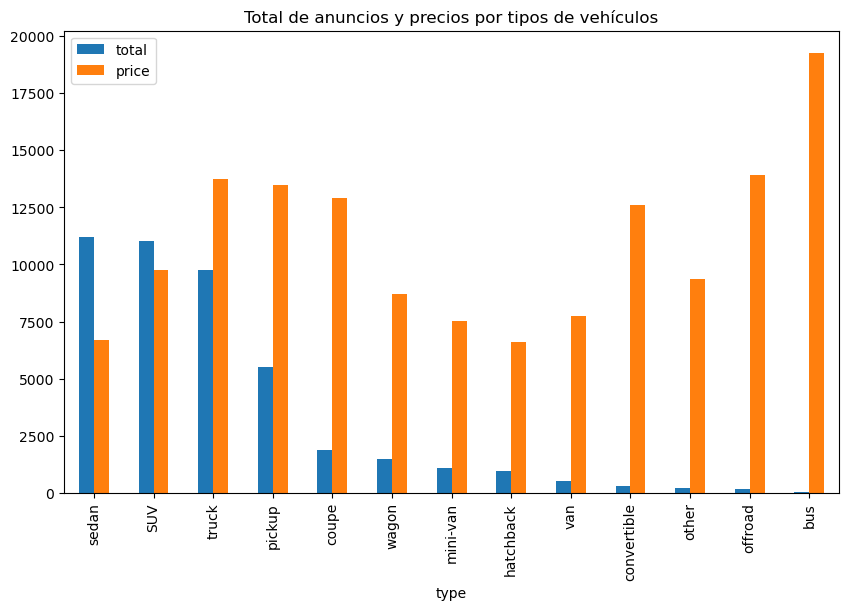

In [64]:
type_price.plot(kind='bar', figsize=(10,6), title='Total de anuncios y precios por tipos de vehículos')
plt.show()

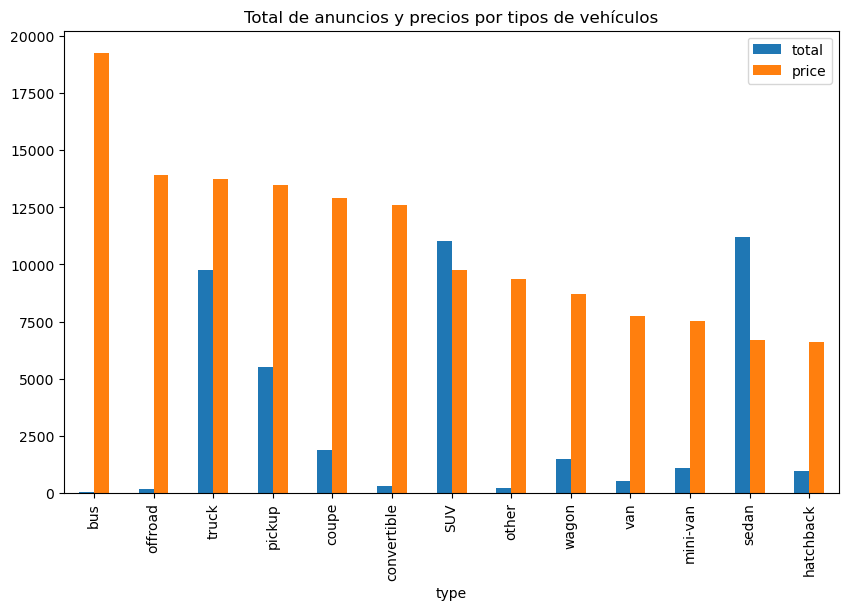

In [65]:
type_price.sort_values(by='price', ascending=False).plot(
    kind='bar', figsize=(10,6), title='Total de anuncios y precios por tipos de vehículos')
plt.show()

Los vehículos tipo SUV y sedán son los más populares, es decir más anunciados, y los de tipo affroad y bus son los menos populares.

Los vehículos tipo bus y affroad son los más costosos, en cambio los de tipo sedan y hatchback tienen los precios más asequibles.

No existe correlación entre el número de anuncios por tipo de vehiculo y precio promedio por tipo de vehiculo.

[Volver a Contenidos](#back)

## Factores de precio<a id='fact'></a>

Revisemos las correlaciones para los carros más populares, es decir los SUV y sedán.

In [66]:
# Filtrado de datos de SUV y Sedán

suv   = data_clean.query('type == "SUV"')
sedan = data_clean.query('type == "sedan"')

In [67]:
# Revisamos correlaciones para SUV y para Sedán

print('Correlaciones de precios de SUV:')
print(suv.corr(numeric_only=True).price.sort_values(ascending=False))

print()
print('Correlaciones de precios de sedán:')
print(sedan.corr(numeric_only=True).price.sort_values(ascending=False))

Correlaciones de precios de SUV:
price          1.000000
model_year     0.566995
condition      0.267018
miles_year     0.155508
is_4wd         0.120618
day_week       0.013150
year           0.009174
days_listed   -0.013601
month         -0.014183
cylinders     -0.025451
odometer      -0.477718
use_years     -0.565204
Name: price, dtype: float64

Correlaciones de precios de sedán:
price          1.000000
model_year     0.622811
condition      0.302467
miles_year     0.086223
is_4wd         0.057924
year           0.036031
days_listed   -0.001574
day_week      -0.006376
month         -0.038975
cylinders     -0.039405
odometer      -0.545430
use_years     -0.619298
Name: price, dtype: float64


Revisando los precios de los vehículos más populares, es decir los SUV y sedán, hemos encontrado correlaciones positivas y negativas con el año del modelo, el millaje y los años de uso, que revisaremos a continuación. 


Detalle de las correlaciones importantes:

- Correlaciones de precios de SUV:
    - model_year     0.57
    - odometer      -0.48
    - use_years     -0.56


- Correlaciones de precios de sedán:
    - model_year     0.62
    - odometer      -0.54
    - use_years     -0.62


**Relación precio y año del modelo:**

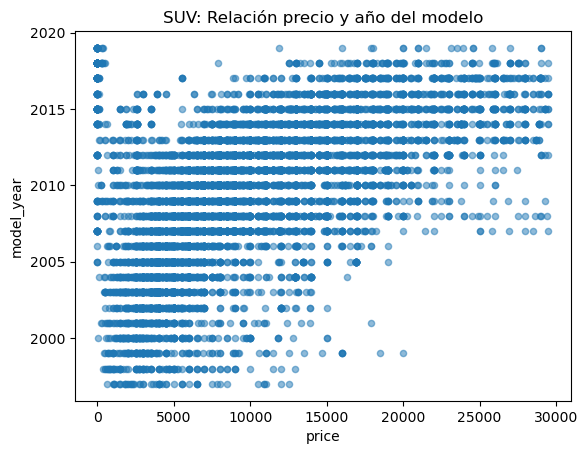

In [68]:
suv.plot(kind='scatter', x='price', y='model_year', alpha=0.5, title='SUV: Relación precio y año del modelo')
plt.show()

Para los SUV: Entre más alto (más actual) es el año del modelo del vehículo, mayor es el precio. Por lo contrario, mientras menor sea el año del vehículo (menos actual) su precio disminuye.

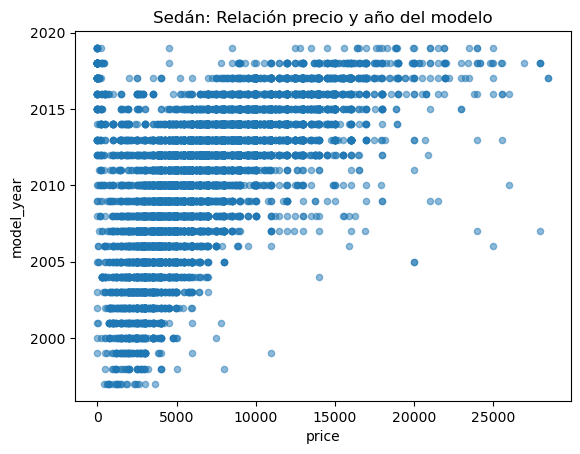

In [69]:
sedan.plot(kind='scatter', x='price', y='model_year', alpha=0.5, title='Sedán: Relación precio y año del modelo')
plt.show()

En los Sedán, pasa parecido a los SUV. Entre más alto (más actual) es el año del modelo del vehículo, mayor es el precio. Por lo contrario, mientras menor sea el año del vehículo (menos actual) su precio disminuye.

**Relación entre precio y millaje**

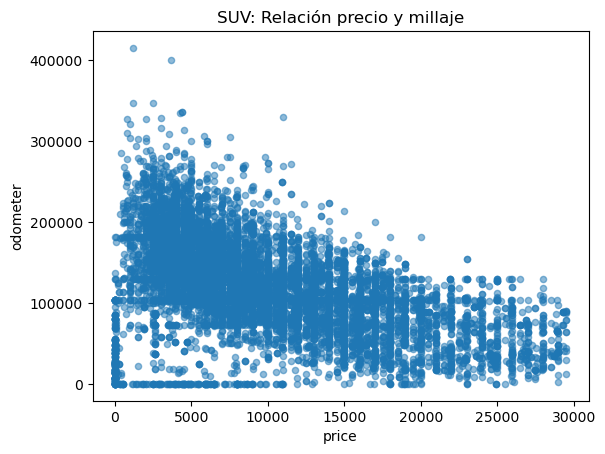

In [70]:
suv.plot(kind='scatter', x='price', y='odometer', alpha=0.5, title='SUV: Relación precio y millaje')
plt.show()

En los SUV observamos que entre menos millaje tiene el vehículo, mayor es el precio del vehículo. Por lo contrario, mientras más millaje tiene su precio es menor.

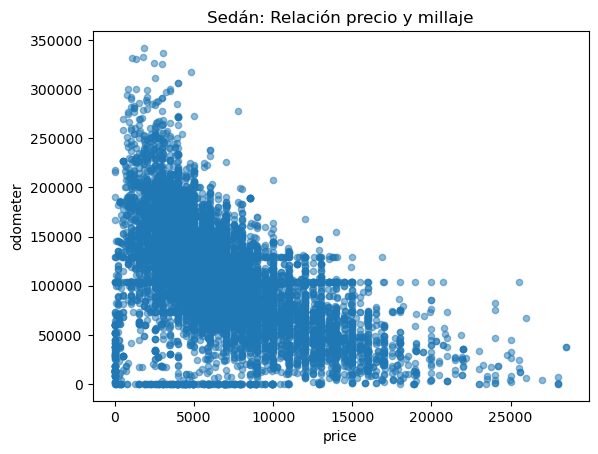

In [71]:
sedan.plot(kind='scatter', x='price', y='odometer', alpha=0.5, title='Sedán: Relación precio y millaje')
plt.show()

De manera parecida se mantiene el comportamiento para los Sedán. Entre menos millaje tiene el vehículo, mayor es el precio del vehículo. Por lo contrario, mientras más millaje tiene su precio es menor.

**Relación entre precio y años de uso**

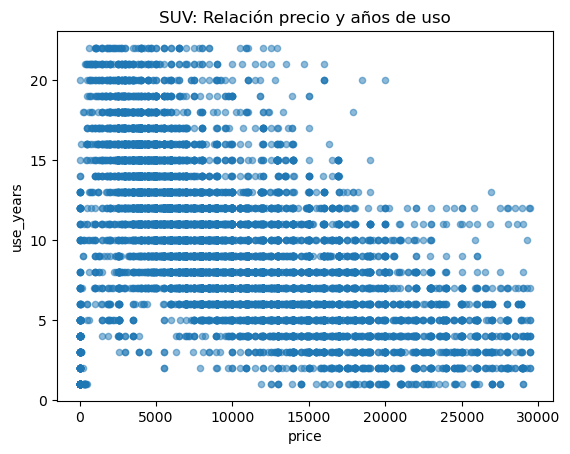

In [72]:
suv.plot(kind='scatter', x='price', y='use_years', alpha=0.5, title='SUV: Relación precio y años de uso')
plt.show()

En los SUV, entre menos años de uso tiene el vehículo mayor es su precio, en cambio a menor tiempo de uso su precio incrementa.

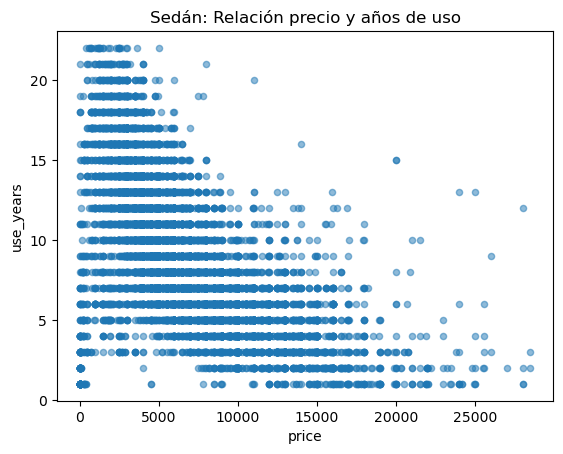

In [73]:
sedan.plot(kind='scatter', x='price', y='use_years', alpha=0.5, title='Sedán: Relación precio y años de uso')
plt.show()

Continuamos con un comportamiento similar para los Sedán. Entre menos años de uso tiene el vehículo mayor es su precio, en cambio a menor tiempo de uso su precio incrementa.

En relaciones analizadas nos muestra claramente que los vehículos tipo sedán son menos costosos que los SUV, vemos menos sedán publicados con precios de más de 20.000.


A continuación también los precios de acuerdo al tipo de transmisión y color del vehículo.

**Relación entre precio y transmisión**

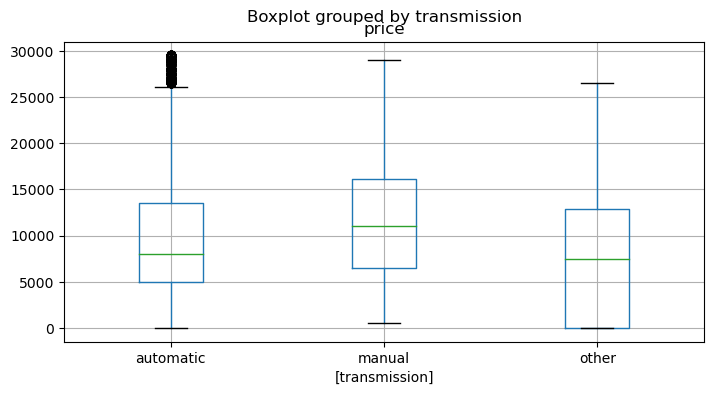

In [74]:
# Revisamos precios por transmisión en los SUV

suv.boxplot(column='price', by=['transmission'], figsize=(8, 4))
plt.show()

Podemos observar que la transmisión manual es más costosa en los carros sedán.

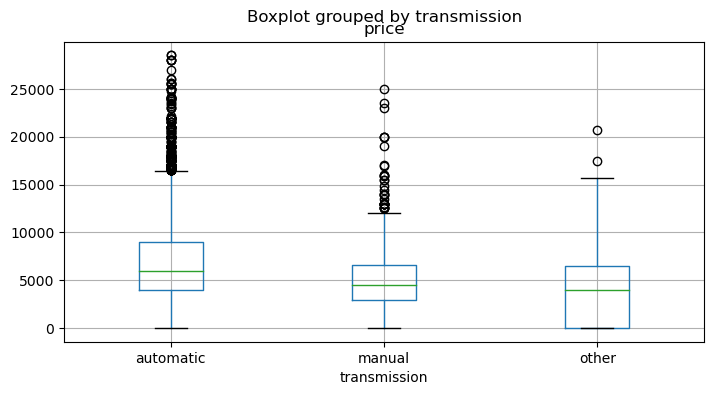

In [75]:
# Revisamos precios por transmision en los sedán

sedan.boxplot(column='price', by='transmission', figsize=(8, 4))
plt.show()

Podemos observar que la transmisión automática es más costosa en los carros SUV.

Los SUV y los sedán con otro tipo de transmisión (ni manual ni automática), son menos costosas en ambos casos.

**Relación entre precio y color**

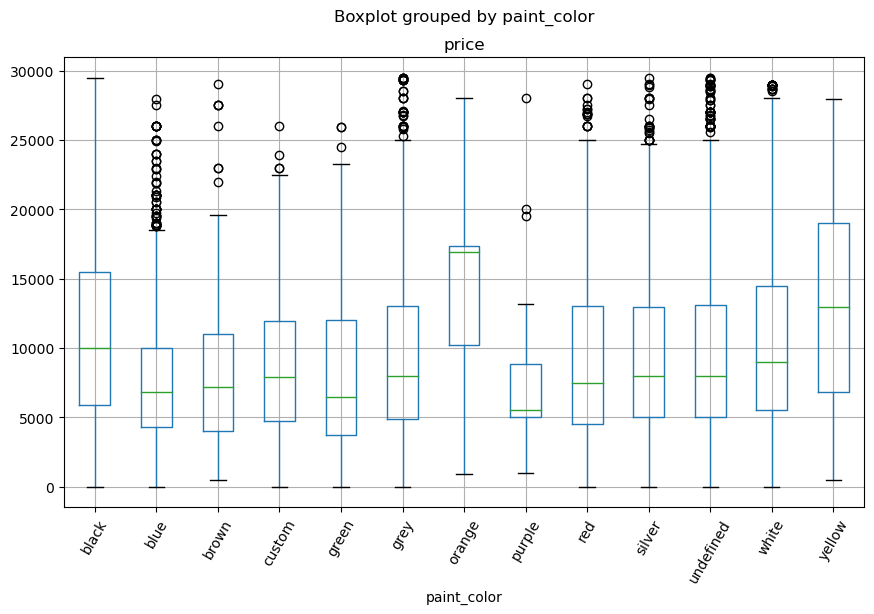

In [76]:
# Revisamos precios por color para SUV

suv.boxplot(column='price', by='paint_color', figsize=(10, 6))
plt.xticks(rotation=60)
plt.show()

Los SUV más costosos son los de color naranja, le siguen los de color amarillo. Por otro lado, los SUV más baratos son los de color morado, le siguen los de color verde.

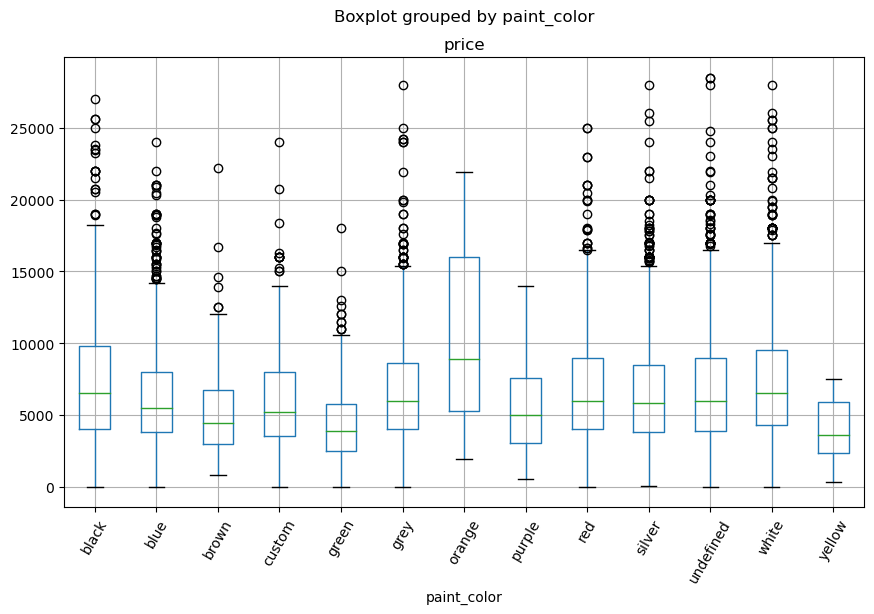

In [77]:
# Revisamos precios por color para Sedán

sedan.boxplot(column='price', by='paint_color',  figsize=(10, 6))
plt.xticks(rotation=60)
plt.show()

Finalmente, observamos que los vehículos sedán al igual que los SUV de color naranja son los más caros le siguen los de color negro, y a diferencia de los SUV, los sedán amarillos son los más baratos, le siguen los verdes.

[Volver a Contenidos](#back)

## Conclusión general<a id='end'></a>

1. El dataset tenía información faltante de año del modelo, cilindraje, millaje, color y tracción. Cada columna fue tratada de manera individual, imputando con valores de medianas condicionados a otros factores como modelo o condición del vehículo para las columnas model_year, cylinders y odometer. Para los colores faltantes se asignó la categoría 'undefined' y en is_4wd se asignó 0 (false).


2. Se limpiaron valores atípicos de price, use_years y miles_year; se eliminaron el 15% de registros y se creo un nuevo dataset con el cual empezamos el análisis de los datos.


3. Se tiene el siguiente análisis al estudiar las características de los vehículos publicados:

    * Los precios más populares de los vehÍculos están entre 4.000 a 7.000 usd.
    * De 5 a 9 años es la edad de los carros publicados más frecuentemente.
    * El millaje anual de los vehículos más publicados está entre 8.000 a 15.000.
    * La vida útil típica de un anuncio es de 18 días, y el periodo de colocación habitual es de 15 a 35 días. Si un anuncio se elimina en menos de 5 días, esto es anormalmente rápido. Si un anuncio ha estado publicado durante más de 100 dias, es anormalmente largo.
    * Los vehículos tipo SUV y sedán son los más populares, es decir más anunciados, y los de tipo affroad y bus son los menos populares. 
    * Los vehículos tipo bus y affroad son los más costosos, en cambio los de tipo sedán y hatchback tienen los precios más asequibles. 
    * No existe correlación entre el número de anuncios por tipo de vehículo y precio promedio por tipo de vehículo.


4.  Finalmente, tenemos que los factores que inciden en el precio de los vehículos SUV y sedán, por lo que podemos concluir que:
   - Tanto para los SUV y Sedán 
       * Entre más actual es el modelo del vehículo, mayor es el precio del vehículo.
       * Entre menos kilometraje tiene el vehículo, más alto es el precio del vehículo.
       * Entre menos años de uso tenga el vehículo, más alto será su valor.
       
   - Los SUV con transmisión manual son los más caros, en cambio, los sedán con transmisión automática son más costosos.
   - Los SUV y sedán con transmisión tipo other (ni manual, ni automática) son menos caros.
   - Los SUV y sedán de color anaranjado son más caros. 
   - Los SUV morados son los más baratos, en cambio, los sedán amarillos son los más baratos.

[Volver a Contenidos](#back)